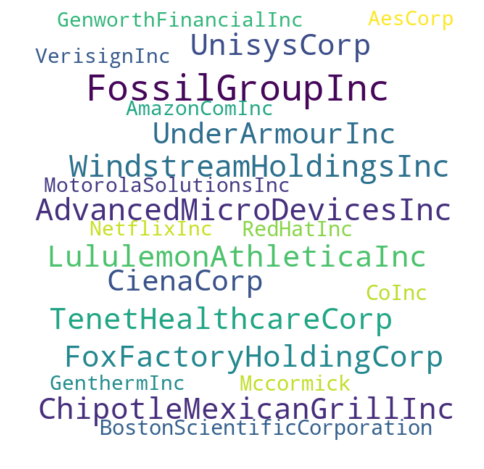

,pct_change
Year-to-Date Best Performing Stocks,
FossilGroupInc.,123.47%
AdvancedMicroDevicesInc,93.99%
WindstreamHoldingsInc.,69.10%
LululemonAthleticaInc.,66.33%
FoxFactoryHoldingCorp,64.41%
TenetHealthcareCorp,63.04%
UnisysCorp,61.92%
ChipotleMexicanGrillInc,61.53%
UnderArmourInc.,59.84%


In [36]:
#Weekly: input 1; Monthly: input 2.
def get_best_weekly_performers(x=1):
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    
    w_output_list = []
    w_stock_list = []
    w_pct_list = []
    
    if x==1:
        url = "https://csimarket.com/markets/Stocks.php?days=yday&=#tablecomp"
    elif x==2:
        url = "https://csimarket.com/markets/Stocks.php?days=week&=#tablecomp"
    elif x==3:
        url = "https://csimarket.com/markets/Stocks.php?days=month&=#tablecomp"
    elif x==4:
        url = "https://csimarket.com/markets/Stocks.php?days=quarter&=#tablecomp"
    elif x==5:
        url = "https://csimarket.com/markets/Stocks.php?days=ytd&=#tablecomp"
    else:
        return 'Wrong input!'
    
    results_page = requests.get(url)
    soup = BeautifulSoup(results_page.content,'lxml')
    all_tags = soup.find_all('td', class_='lk')
    for tag in all_tags:
        w_output_list.append(tag.get_text().replace(',','').replace('\xa0','').replace(' ',''))
    for i in range(0,40):
        if i % 2 == 0:
            w_stock_list.append(w_output_list[i])
        if i % 2 == 1:
            w_pct_list.append((w_output_list[i]))
    
    df = pd.DataFrame(w_pct_list, w_stock_list)    
    if x==1:
        df.index.name = 'Daily Best Performing Stocks'
    elif x==2:
        df.index.name = 'Weekly Best Performing Stocks'
    elif x==3:
        df.index.name = 'Monthly Best Performing Stocks'
    elif x==4:
        df.index.name = 'Quarterly Best Performing Stocks'
    elif x==5:
        df.index.name = 'Year-to-Date Best Performing Stocks'
    else:
        return None
    df.columns = ['pct_change']
    
    stock_string=(" ").join(w_stock_list)
    wordcloud = WordCloud(width = 600, height = 600, max_font_size=50, min_font_size=10, background_color="white").generate(stock_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig("wordcloud"+".png", bbox_inches='tight')
    plt.show()
    plt.close()
    
    return df

    
get_best_weekly_performers(5)



In [9]:
import requests
from bs4 import BeautifulSoup

def get_best_monthly_performers():
    m_output_list = []
    m_stock_list = []
    m_pct_list = []
    url = "https://csimarket.com/markets/Stocks.php?days=month&=#tablecomp"
    results_page = requests.get(url)
    soup = BeautifulSoup(results_page.content,'lxml')
    all_tags = soup.find_all('td', class_='lk')
    for tag in all_tags:
        m_output_list.append(tag.get_text().replace(',','').replace('\xa0','').replace(' ',''))
    for i in range(0,40):
        if i % 2 == 0:
            m_stock_list.append(m_output_list[i])
        if i % 2 == 1:
            m_pct_list.append((m_output_list[i]))
    
    df = pd.DataFrame(m_pct_list, m_stock_list)
    df.columns = ['pct_change']
    
    
    
    return df
    #return m_output_list[0:40]
    #return m_stock_list
    #return m_pct_list
    
get_best_monthly_performers()

NameError: name 'm_stock_list' is not defined

In [14]:
m_output_list = []
m_stock_list = []
m_pct_list = []
url = "https://csimarket.com/markets/Stocks.php?days=month&=#tablecomp"
results_page = requests.get(url)
soup = BeautifulSoup(results_page.content,'lxml')
all_tags = soup.find_all('td', class_='lk')
for tag in all_tags:
    m_output_list.append(tag.get_text().replace(',','').replace('\xa0','').replace(' ',''))
for i in range(0,40):
    if i % 2 == 0:
        m_stock_list.append(m_output_list[i])
    if i % 2 == 1:
        m_pct_list.append((m_output_list[i]))

df = pd.DataFrame(m_pct_list, m_stock_list)
df.columns = ['pct_change']

m_stock_list

['RedHatInc',
 'RrDonnelley&SonsCo',
 'NewellBrandsInc',
 'CooperTire&RubberCompany',
 'OshkoshCorp',
 'ScanaCorporation',
 'DormanProductsInc.',
 'ClearwaterPaperCorp',
 'OfficeDepotInc',
 'FoxFactoryHoldingCorp',
 'CocaColaBottlingCoConsolidated',
 'PitneyBowesInc',
 'GenworthFinancialInc',
 'SealedAirCorp',
 '22ndCenturyGroupInc.',
 'MicrochipTechnologyInc',
 'SummitMaterialsInc.',
 'MartinMariettaMaterialsInc',
 'FederatedInvestorsInc',
 'UnderArmourInc.']

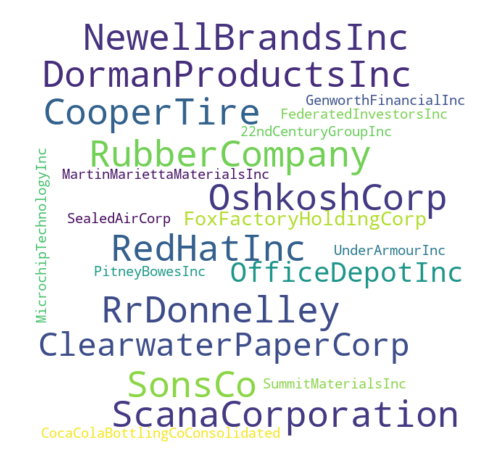

In [26]:
stock_string=(" ").join(m_stock_list)
wordcloud = WordCloud(width = 600, height = 600, max_font_size=50, min_font_size=10, background_color="white").generate(stock_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()


In [5]:
def get_all_indexes():
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd
    index_list = []
    last_list = []
    change_list = []
    change2_list = []
    url = "https://markets.wsj.com/"
    results_page = requests.get(url)
    soup = BeautifulSoup(results_page.content,'lxml')
    index_tags = soup.find_all('td', class_='firstCol')
    last_tags = soup.find_all('td', class_='dataCol dataColCenter')
    for tag in index_tags:
        index_list.append(tag.get_text().replace('\n',''))
    for tag in last_tags:
        last_list.append(tag.get_text())
    index_list = index_list[23:42]

    df = pd.DataFrame(last_list, index_list)
    df.index.name = 'Major U.S. Stock Indexes'
    df.columns = ['Last']
    return df

get_all_indexes()

,Last
Major U.S. Stock Indexes,
DJIA,25538.46
DJ Transportation Average,10820.20
DJ Utility Average,741.92
DJ Total Stock Market,28418.59
Barron's 400,687.81
Nasdaq Composite,7330.54
Nasdaq 100,6949.01
S&P 500,2760.17
S&P MidCap 400,1878.65
